# INCOME CLASSIFICATION PROJECT

# 1.00 Introduction

Peoples income is the amount of money they receive from various life engagements. This amount of money can be affected by various factors such as economy, inflation, nature of work that is engaged in etc. This project is therefore designed to predict the income of individuals given various conditions and situations. This work is capable of helping individuals in the management of their hard-earned income so as to derive maximum value from it.

# 2.00 Problem Statement

This project has a goal of developping a machine laerning model predicts whether an individual's  income exceeds 50k based on demographic and employment-related features. The dataset has age, workclass, educational level, marital-status, occupation, realationship, race, sex, capital gain, capital loss, hours worked per week and native country as its features. The primary challenge is to develop a model that is robust against the class imbalance in the dataset and also can accurately classify income levels to aid in policy making, business decisions and social research.

# 3.00 Research Questions


1. How does the imbalance in the income classes affect the performance of various machine learning models, and how will the imbalance effect be mitigated?
2. What is the optimal combination of feature selection and resampling techniques to enhance model performance?
3. Can visualizing the data provide actionable insights into income distribution across different demographic and employment-related groups?

# 4.00 Aim and Objectives

### I. Aim

To develop a model that can accurately classify income levels of individuals

### II. Objectives

I. To evaluate the performance of various models for the classification project.

II. To visualize the relationship among the various features in the dataset.

# 5.00 Data Collection and Preparation

### I. Importing Libraries and Modules

In [ ]:
# importing various modules, libries and classes essential to this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### II. Data Importation

In [ ]:
# importing the dataset using the read_csv function
data = '/content/drive/MyDrive/Colab Notebooks/income_data.csv'

# reading file into dataframe
df = pd.read_csv(data)

# 6.00 Initial Data Inspection

Preliminary inspection of the dataset is carried-out. it is done to have an initial insight into the data before the deeper exploratory data analysis.

### I.  Dataset Overview

In [ ]:
# Displaying the dataset head
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Displaying information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# Displaying sample of the Dataset
df.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
240,40,Private,347890,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
47614,34,Private,205581,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States,<=50K
7119,47,Private,26950,Masters,14,Divorced,Sales,Not-in-family,White,Female,0,0,6,United-States,<=50K


### II. Discriptive statistics of the Dataset

In [ ]:
# Displaying the descriptive statics of the  Dataset
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### III. Checking for Duplicates in the Dataset

In [ ]:
# checking for duplicates
df.duplicated().sum()

48


### IV. Checking for Missing Values in the Dataset

In [ ]:
# Displaying missing values in the Dataset
df.isna().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


### V. Other Characteristics of the Dataset

In [ ]:
# Displaying the value counts of 'income'
df['income'].value_counts()

,count
income,
<=50K,37155
>50K,11687


In [ ]:
 # Displaying the value counts of 'workclass'
df['workclass'].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
?,1836
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [ ]:
# Displaying the value counts of 'marital-status'
df['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,22379
Never-married,16117
Divorced,6633
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37


In [ ]:
# Displaying the value counts of 'occupation'
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072


In [ ]:
# Displaying the value counts of 'relationship'
df['relationship'].value_counts()

,count
relationship,
Husband,19716
Not-in-family,12583
Own-child,7581
Unmarried,5125
Wife,2331
Other-relative,1506


In [ ]:
# Displaying the value counts of 'race'
df['race'].value_counts()

,count
race,
White,41762
Black,4685
Asian-Pac-Islander,1519
Amer-Indian-Eskimo,470
Other,406


In [ ]:
# Displaying the value counts of 'sex'
df['sex'].value_counts()

,count
sex,
Male,32650
Female,16192


In [ ]:
# Displaying the value counts of 'native-country'
df['native-country'].value_counts()

,count
native-country,
United-States,43832
Mexico,951
?,583
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


# 7.00 Exploratory Data Analysis (EDA)

### I. General Information on the Dataset

In [ ]:
# Displaying information on the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# Displaying the shape of the Dataset
df.shape

(48842, 15)

In [ ]:
# Displaying the Data types of the Dataset
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [ ]:
# Displaying the size of the Dataset
df.size

732630

### II. Discriptive statistics

In [ ]:
# Displaying the descriptive statistics of the Dataset
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### III. Checking for Class imbalances in the Dataset

The presence of class imbalance has been detected. with <=50k having 37155 while >50k has only 11687.

In [ ]:
df['income'].value_counts()

,count
income,
<=50K,37155
>50K,11687


### IV. Insights from the Dataset

1. Income Distribution by Education Level: According to the dataset HS-grad has the highest number of people with income <=50k, while those with Bachelor degree lead in >50k income.

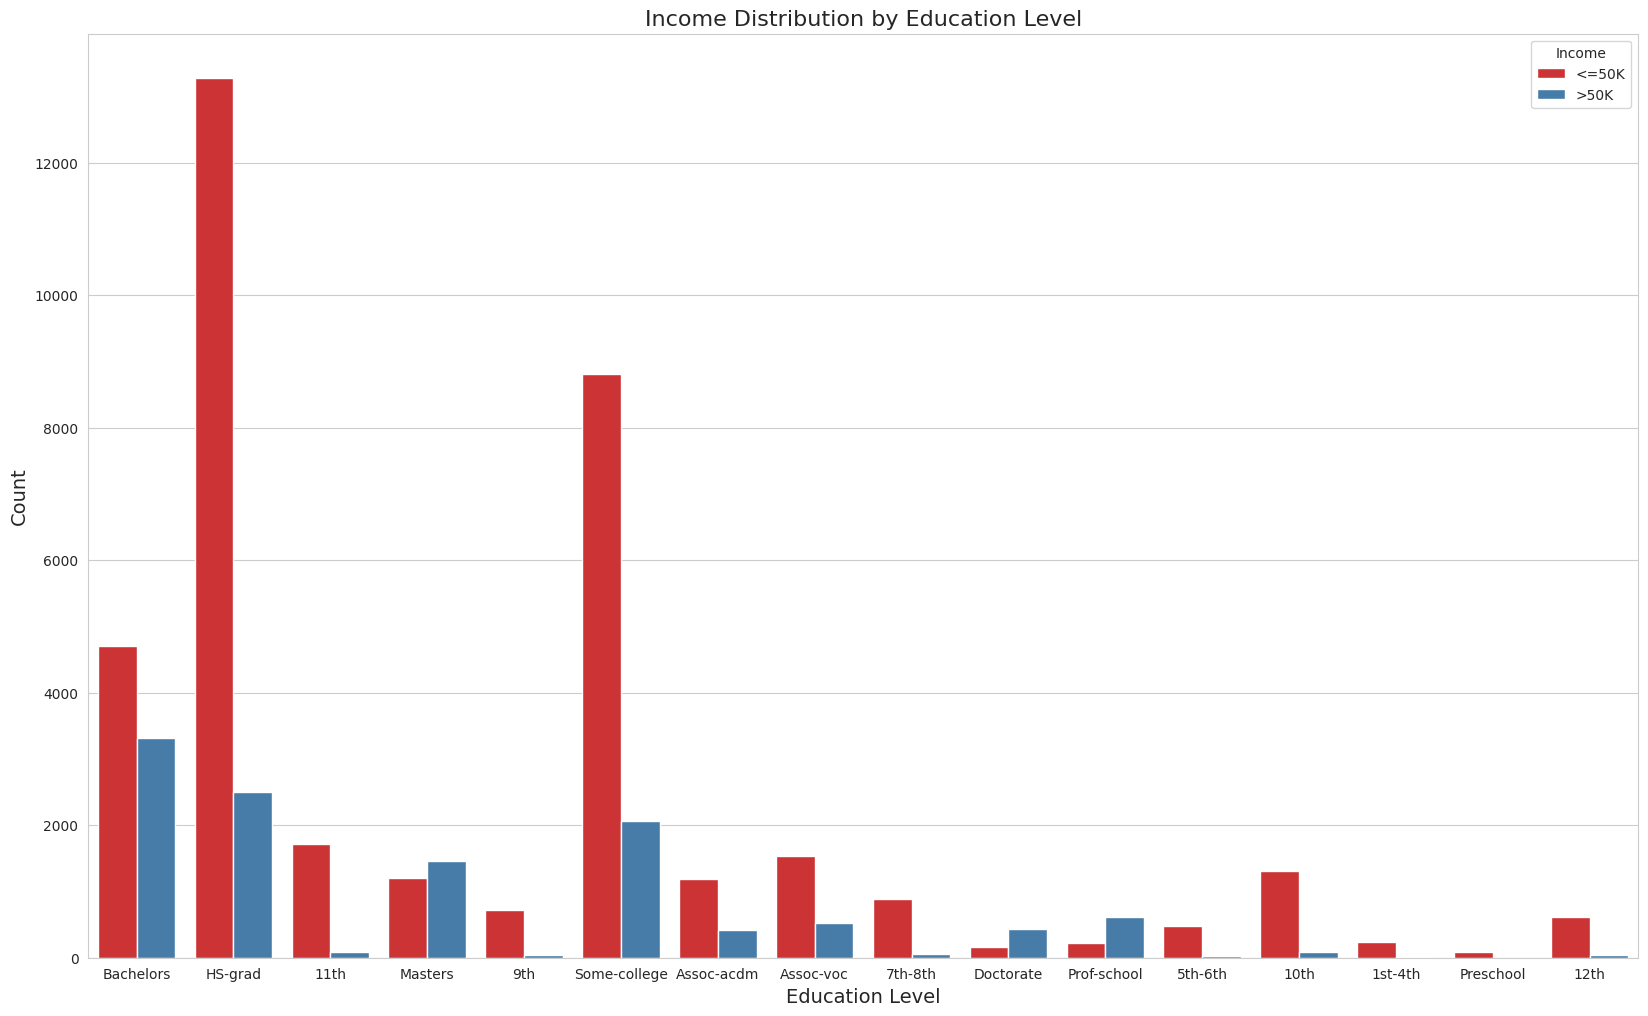

In [ ]:
# 1. Income Distribution by Education Level
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")
plt.figure(figsize=(20, 12))
sns.countplot(data=df, x='education', hue='income', palette='Set1')
plt.title('Income Distribution by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Income')
plt.show()

2. Income Distribution by Age:  As displayed below, there are more people aged 35-40 that are earning <=50k than those within the same age range that are earning >50k in the dataset.

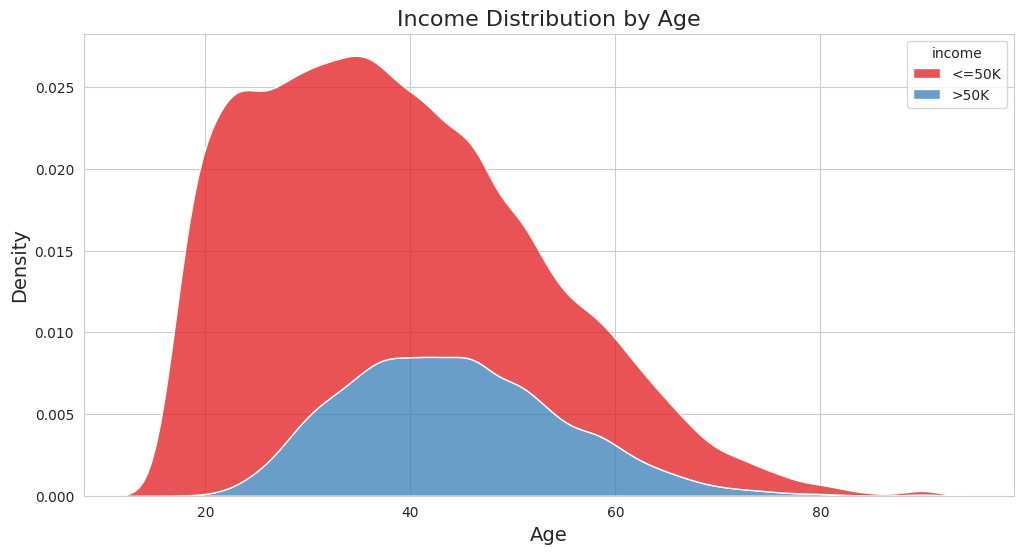

In [ ]:
# 2. Income Distribution by Age
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='age', hue='income', multiple='stack', palette='Set1')
plt.title('Income Distribution by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()
plt.show()

3. Income Distribution by Workclass: those earning <=50k are the majority and are mostly concentrated in the 'private' workclass.

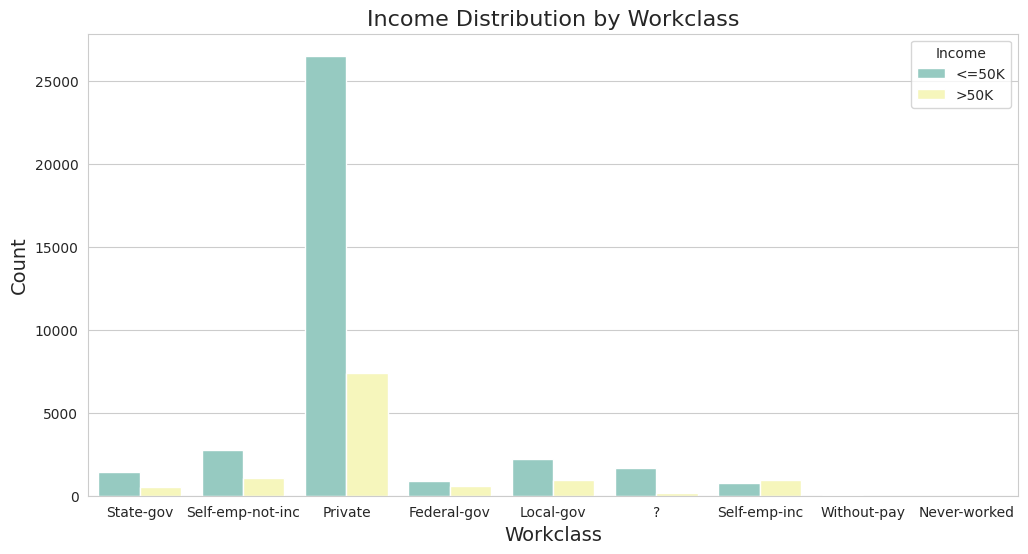

In [ ]:
# 3. Income Distribution by Workclass
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='workclass', hue='income', palette='Set3')
plt.title('Income Distribution by Workclass', fontsize=16)
plt.xlabel('Workclass', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Income')
plt.show()

4. Income Distribution by Hours per Week: This shows how hours-per-week influence income gain.

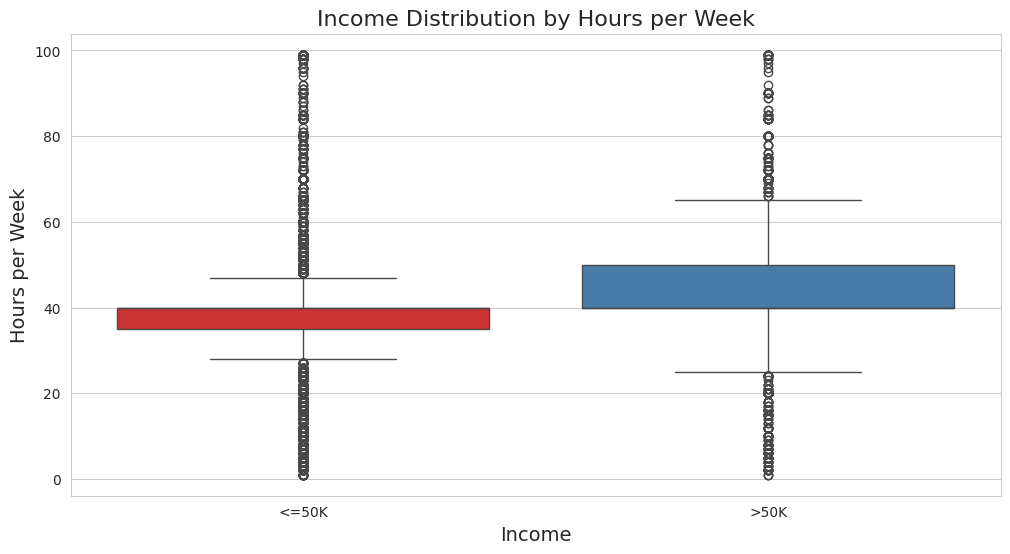

In [ ]:

# 4. Income Distribution by Hours per Week
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='income', y='hours-per-week', palette='Set1')
plt.title('Income Distribution by Hours per Week', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Hours per Week', fontsize=14)
plt.show()

# 8.00 Data Preprocessing and Feature Engineeering

### I. Dropping Irrelevant Features from the Dataset

Relevant features contribute to the prediction while irrelevant features contribute noise, bias and redundancy in a model. Therefore removing these irrelevant features from a dataset is very essential. The following features were removed due to various reasons outlined.

1. fnlwght(final weight): is a census-based feature and is not directly related to predicting income.

2. education: is a categorical version of education-num. keeping both creates redundancy.

3. Relationship: This can be redundant because the inclusion of marital-status and might introduce bias.

4. Native-country: This is usually less relevant and can intriduce bias unless theirs a specific hypothesis one is testing related to country of origin.

In [ ]:
# Dropping irrelevant features from the dataset
df = df.drop(['fnlwgt', 'education', 'relationship', 'native-country'], axis=1)

# Displaying the new dataframe
display(df)

,age,workclass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,0,0,40,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,13,Divorced,Prof-specialty,White,Female,0,0,36,<=50K
48838,64,NaN,9,Widowed,NaN,Black,Male,0,0,40,<=50K
48839,38,Private,13,Married-civ-spouse,Prof-specialty,White,Male,0,0,50,<=50K
48840,44,Private,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,5455,0,40,<=50K


In [ ]:
df

,age,workclass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,0,0,40,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,13,Divorced,Prof-specialty,White,Female,0,0,36,<=50K
48838,64,NaN,9,Widowed,NaN,Black,Male,0,0,40,<=50K
48839,38,Private,13,Married-civ-spouse,Prof-specialty,White,Male,0,0,50,<=50K
48840,44,Private,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,5455,0,40,<=50K


### II. Handling Missing Values

In [ ]:
# Displaying missing values in the dataset
df.isna().sum()

age                 0
workclass         963
education-num       0
marital-status      0
occupation        966
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
income              0
dtype: int64

In [ ]:
# instantiating simpleimputer
imputer = SimpleImputer(strategy='most_frequent')

# fitting and transforming the features concerned
df[['workclass', 'occupation']] = imputer.fit_transform(df[['workclass', 'occupation']])

In [ ]:
# Verifying the imputer process
df.isna().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
income            0
dtype: int64

### III. Handling Duplicates in the Dataset

In [ ]:
# Checking for Duplicates in the Dataset
df.duplicated().sum()

8606

In [ ]:
# Dropping Duplicates
df = df.drop_duplicates()

In [ ]:
# Verifying the drop duplicates process
df.duplicated().sum()

0

### IV. Seperation of Dataset into Features (X) and Label (y)

In [ ]:
# Seperating dataset into features (X)
X = df.drop(['income'], axis=1)

# Seperating dataset into label (y)
y = df['income']

### V. Encoding Categorical Variables

 Encoding Features (X)

In [ ]:
# Instantiating OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# columns to encode
columns_to_encode = ['workclass', 'marital-status', 'occupation', 'race', 'sex']

# fit and transforming the features
encoded_features = encoder.fit_transform(X[columns_to_encode])

# Creating dataframe for the encoded features
encoded_df = pd.DataFrame(encoded_features, columns= encoder.get_feature_names_out(columns_to_encode))

# Resetting the index of the new dataframe of encoded features
encoded_df.reset_index(drop=True, inplace=True)

# Resetting the index of X
X.reset_index(drop=True, inplace=True)

# Concatnating the encoded dataframe and X
df_encoded = pd.concat([X.drop(columns_to_encode, axis=1), encoded_df], axis=1)

# Passing the new marged dataframe to X
X = df_encoded

# Displaying X
display(X)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_nan,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,13,2174,0,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,50,13,0,0,13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,38,9,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,53,7,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,28,13,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40231,48,14,0,0,40,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
40232,39,13,0,0,36,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40233,64,9,0,0,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
40234,44,13,5455,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Encoding Label (y)

In [ ]:
# instantiating LabelEncoder
lab_encoder = LabelEncoder()

# fit and transforming (y)
y_encoded = lab_encoder.fit_transform(y)

# Passing encoded y to y
y = y_encoded

# Displaying y
display(y)

array([0, 0, 0, ..., 0, 0, 1])

### VI. Features Scaling

In [ ]:
# instantiating standardscaler
scaler = StandardScaler()

# fit and transforming (y)
scaled_X = scaler.fit_transform(X)

# Creating dataframe for the scaled features
X = pd.DataFrame(scaled_X, columns= X.columns)

# Displaying X
display(X)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_nan,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,-0.070142,1.073139,0.108172,-0.23929,-0.057334,-0.188668,-0.282102,-0.015767,-1.365723,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,-0.349194,-0.100962,0.448373,0.709837
1,0.727177,1.073139,-0.158825,-0.23929,-2.113789,-0.188668,-0.282102,-0.015767,-1.365723,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,-0.349194,-0.100962,0.448373,0.709837
2,-0.142625,-0.412315,-0.158825,-0.23929,-0.057334,-0.188668,-0.282102,-0.015767,0.732213,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,-0.349194,-0.100962,0.448373,0.709837
3,0.944627,-1.155042,-0.158825,-0.23929,-0.057334,-0.188668,-0.282102,-0.015767,0.732213,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,2.863740,-0.100962,-2.230284,0.709837
4,-0.867460,1.073139,-0.158825,-0.23929,-0.057334,-0.188668,-0.282102,-0.015767,0.732213,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,2.863740,-0.100962,-2.230284,-1.408774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40231,0.582210,1.444502,-0.158825,-0.23929,-0.057334,-0.188668,3.544819,-0.015767,-1.365723,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,-0.349194,-0.100962,0.448373,0.709837
40232,-0.070142,1.073139,-0.158825,-0.23929,-0.361994,-0.188668,-0.282102,-0.015767,0.732213,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,-0.349194,-0.100962,0.448373,-1.408774
40233,1.741946,-0.412315,-0.158825,-0.23929,-0.057334,-0.188668,-0.282102,-0.015767,-1.365723,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,6.835901,-0.195827,2.863740,-0.100962,-2.230284,0.709837
40234,0.292276,1.073139,0.511125,-0.23929,-0.057334,-0.188668,-0.282102,-0.015767,0.732213,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,5.106537,-0.349194,-0.100962,-2.230284,0.709837


In [ ]:
X

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_nan,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,-0.070142,1.073139,0.108172,-0.23929,-0.057334,-0.188668,-0.282102,-0.015767,-1.365723,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,-0.349194,-0.100962,0.448373,0.709837
1,0.727177,1.073139,-0.158825,-0.23929,-2.113789,-0.188668,-0.282102,-0.015767,-1.365723,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,-0.349194,-0.100962,0.448373,0.709837
2,-0.142625,-0.412315,-0.158825,-0.23929,-0.057334,-0.188668,-0.282102,-0.015767,0.732213,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,-0.349194,-0.100962,0.448373,0.709837
3,0.944627,-1.155042,-0.158825,-0.23929,-0.057334,-0.188668,-0.282102,-0.015767,0.732213,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,2.863740,-0.100962,-2.230284,0.709837
4,-0.867460,1.073139,-0.158825,-0.23929,-0.057334,-0.188668,-0.282102,-0.015767,0.732213,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,2.863740,-0.100962,-2.230284,-1.408774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40231,0.582210,1.444502,-0.158825,-0.23929,-0.057334,-0.188668,3.544819,-0.015767,-1.365723,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,-0.349194,-0.100962,0.448373,0.709837
40232,-0.070142,1.073139,-0.158825,-0.23929,-0.361994,-0.188668,-0.282102,-0.015767,0.732213,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,-0.349194,-0.100962,0.448373,-1.408774
40233,1.741946,-0.412315,-0.158825,-0.23929,-0.057334,-0.188668,-0.282102,-0.015767,-1.365723,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,6.835901,-0.195827,2.863740,-0.100962,-2.230284,0.709837
40234,0.292276,1.073139,0.511125,-0.23929,-0.057334,-0.188668,-0.282102,-0.015767,0.732213,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,5.106537,-0.349194,-0.100962,-2.230284,0.709837


In [ ]:
lab_encoder = LabelEncoder()

y_encoded = lab_encoder.fit_transform(y)

y_encoded

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y = y_encoded

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 1])

### Features Scaling


In [ ]:
scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)

X = pd.DataFrame(scaled_X, columns= X.columns)

In [ ]:
X

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_nan,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,-0.070142,1.073139,0.108172,-0.23929,-0.057334,-0.188668,-0.282102,-0.015767,-1.365723,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,-0.349194,-0.100962,0.448373,0.709837
1,0.727177,1.073139,-0.158825,-0.23929,-2.113789,-0.188668,-0.282102,-0.015767,-1.365723,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,-0.349194,-0.100962,0.448373,0.709837
2,-0.142625,-0.412315,-0.158825,-0.23929,-0.057334,-0.188668,-0.282102,-0.015767,0.732213,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,-0.349194,-0.100962,0.448373,0.709837
3,0.944627,-1.155042,-0.158825,-0.23929,-0.057334,-0.188668,-0.282102,-0.015767,0.732213,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,2.863740,-0.100962,-2.230284,0.709837
4,-0.867460,1.073139,-0.158825,-0.23929,-0.057334,-0.188668,-0.282102,-0.015767,0.732213,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,2.863740,-0.100962,-2.230284,-1.408774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40231,0.582210,1.444502,-0.158825,-0.23929,-0.057334,-0.188668,3.544819,-0.015767,-1.365723,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,-0.349194,-0.100962,0.448373,0.709837
40232,-0.070142,1.073139,-0.158825,-0.23929,-0.361994,-0.188668,-0.282102,-0.015767,0.732213,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,-0.195827,-0.349194,-0.100962,0.448373,-1.408774
40233,1.741946,-0.412315,-0.158825,-0.23929,-0.057334,-0.188668,-0.282102,-0.015767,-1.365723,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,6.835901,-0.195827,2.863740,-0.100962,-2.230284,0.709837
40234,0.292276,1.073139,0.511125,-0.23929,-0.057334,-0.188668,-0.282102,-0.015767,0.732213,-0.206266,...,-0.154242,-0.355478,-0.183377,-0.229848,-0.146287,5.106537,-0.349194,-0.100962,-2.230284,0.709837


### VII. Dimensionality Reduction

In [ ]:
# instantiating Principal Component Analysis (PCA)
pca = PCA(n_components=0.95) # to retain 95% variance after features reduction.

# fitting (X)
pca.fit(X)

PCA(n_components=0.95)

# 9.00 Model Development

### I. Train-Test-Split

In [ ]:
# Seperating X and y into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

### II. Model Selection and Training

**Logistic Regression**

In [ ]:
# instantiating Logistic Regression
log_reg = LogisticRegression()

# fitting the training datasets
log_reg.fit(X_train, y_train)

# testing the model
log_pred = log_reg.predict(X_test)

# printing evaluation metrics
print(classification_report(y_test, log_pred))
print(f1_score(y_test, log_pred))
print(accuracy_score(y_test, log_pred))
print(recall_score(y_test, log_pred))
print(precision_score(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      5945
           1       0.73      0.58      0.65      2103

    accuracy                           0.83      8048
   macro avg       0.80      0.75      0.77      8048
weighted avg       0.83      0.83      0.83      8048

0.6455223880597015
0.834741550695825
0.5758440323347599
0.7343844754396605


**Decision Tree**

In [ ]:
# instantiating Decision Tree Classifier
tree = DecisionTreeClassifier()

# fitting the training datasets
tree.fit(X_train, y_train)

# testing the model
tree_pred = tree.predict(X_test)

# printing evaluation metrics
print(classification_report(y_test, tree_pred))
print(f1_score(y_test, tree_pred))
print(accuracy_score(y_test, tree_pred))
print(recall_score(y_test, tree_pred))
print(precision_score(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5945
           1       0.60      0.59      0.59      2103

    accuracy                           0.79      8048
   macro avg       0.73      0.72      0.73      8048
weighted avg       0.79      0.79      0.79      8048

0.5936751317680882
0.7892644135188867
0.5891583452211127
0.5982617093191694


**K-Nearest Neighbors**

In [ ]:
# instantiating K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# fitting the training datasets
knn.fit(X_train, y_train)

# testing the model
knn_pred = tree.predict(X_test)

# printing evaluation metrics
print(classification_report(y_test, knn_pred))
print(f1_score(y_test, knn_pred))
print(accuracy_score(y_test, knn_pred))
print(recall_score(y_test, knn_pred))
print(precision_score(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5945
           1       0.60      0.59      0.59      2103

    accuracy                           0.79      8048
   macro avg       0.73      0.72      0.73      8048
weighted avg       0.79      0.79      0.79      8048

0.5936751317680882
0.7892644135188867
0.5891583452211127
0.5982617093191694


**Support Vector Machine**

In [ ]:
# instantiating Support Vector Machine Classifier
svm = SVC()

# fitting the training datasets
svm.fit(X_train, y_train)

# testing the model
svm_pred = svm.predict(X_test)

# printing evaluation metrics
print(classification_report(y_test, svm_pred))
print(f1_score(y_test, svm_pred))
print(accuracy_score(y_test, svm_pred))
print(recall_score(y_test, svm_pred))
print(precision_score(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      5945
           1       0.75      0.57      0.64      2103

    accuracy                           0.84      8048
   macro avg       0.80      0.75      0.77      8048
weighted avg       0.83      0.84      0.83      8048

0.6448825276802592
0.8366053677932406
0.5677603423680456
0.74625


**AdaBoost**

In [ ]:
# instantiating AdaBoost Classifier
ada = AdaBoostClassifier()

# fitting the training datasets
ada.fit(X_train, y_train)

# testing the model
ada_pred = ada.predict(X_test)

# printing evaluation metrics
print(classification_report(y_test, ada_pred))
print(f1_score(y_test, ada_pred))
print(accuracy_score(y_test, ada_pred))
print(recall_score(y_test, ada_pred))
print(precision_score(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5945
           1       0.80      0.53      0.64      2103

    accuracy                           0.84      8048
   macro avg       0.82      0.74      0.77      8048
weighted avg       0.84      0.84      0.83      8048

0.6362078812107367
0.8416998011928429
0.5297194484070376
0.7962830593280915


Gradient Boosting

In [ ]:
# instantiating Gradient Boost Classifier
gb = GradientBoostingClassifier()

# fitting the training datasets
gb.fit(X_train, y_train)

# testing the model
gb_pred = gb.predict(X_test)

# printing evaluation metrics
print(classification_report(y_test, gb_pred))
print(f1_score(y_test, gb_pred))
print(accuracy_score(y_test, gb_pred))
print(recall_score(y_test, gb_pred))
print(precision_score(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      5945
           1       0.80      0.59      0.68      2103

    accuracy                           0.86      8048
   macro avg       0.83      0.77      0.79      8048
weighted avg       0.85      0.86      0.85      8048

0.6826739427012278
0.8554920477137177
0.5948644793152639
0.8008962868117798


# 10.00 Hyperparameter Tuning

**Using Grid Search CV**

**Logistic Regression**

In [ ]:
param_grid_log_reg = {"C" : [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'elasticnet', 'NONE'], 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter' : [100, 200, 300]}

grid_search_log_reg = GridSearchCV(estimator= LogisticRegression(), param_grid = param_grid_log_reg,cv=5, n_jobs=-1, scoring='accuracy')

grid_search_log_reg.fit(X_train, y_train)

print(f'Best parameter found for Logistic Regression;{grid_search_log_reg.best_params_}')
print(f'Best cross-validation score: {round(grid_search_log_reg.best_score_, 2)}')

KeyboardInterrupt: 

**Decision Tree**

In [ ]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search_tree = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid = param_grid_tree, cv=5, n_jobs=-1, scoring='accuracy')

grid_search_tree.fit(X_train, y_train)

print(f'Best parameter found for Decision Tree;{grid_search_tree.best_params_}')
print(f'Best cross-validation score: {round(grid_search_tree.best_score_,2)}')

**K-Nearest Neighbors**

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search_knn = GridSearchCV(estimator= KNeighborsClassifier(), param_grid = param_grid_knn, cv=5, n_jobs=-1, scoring='accuracy')

grid_search_knn.fit(X_train, y_train)

print(f'Best parameter found for K-Nearest Neighbors ;{grid_search_knn.best_params_}')
print(f'Best cross-validation score: {round(grid_search_knn.best_score_,2)}')

**Support Vector Machine**


In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

grid_search_svm = GridSearchCV(estimator= SVC(), param_grid = param_grid_svm, cv=5, n_jobs=-1, scoring='accuracy')

grid_search_svm.fit(X_train, y_train)

print(f'Best parameter found for Support Vector Machine ;{grid_search_svm.best_params_}')
print(f'Best cross-validation score: {round(grid_search_svm.best_score_,2)}')

**AdaBoost**


In [ ]:
param_grid_ada = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.05, 1, 1.5, 2],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search_ada = GridSearchCV(estimator= AdaBoostClassifier(), param_grid = param_grid_ada, cv=5, n_jobs=-1, scoring='accuracy')

grid_search_ada.fit(X_train, y_train)

print(f'Best parameter found for AdaBoost ;{grid_search_ada.best_params_}')
print(f'Best cross-validation score: {round(grid_search_ada.best_score_,2)}')

**Gradient Boosting**

In [ ]:
param_grid_gb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search_gb = GridSearchCV(estimator= GradientBoostingClassifier(), param_grid = param_grid_gb, cv=5, n_jobs=-1, scoring='accuracy')

grid_search_gb.fit(X_train, y_train)

print(f'Best parameter found for Gradient Boosting ;{grid_search_gb.best_params_}')
print(f'Best cross-validation score: {round(grid_search_gb.best_score_,2)}')

# 11.00 Model Evaluation

### Selected Model
**Gradient Booster** is the model with the highest best Grid search cross-validation score of 0.87 and is therefore selected for this classication task.

### I. Model Testing

In [ ]:
# Instantiating the GradientBoostingClassifier using the best parameters from grid search
gb = GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features='auto', min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=1.0)

# fitting gb to the training dataset
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

### II. Evaluation metrics

**ROC Curve and AUC Score**

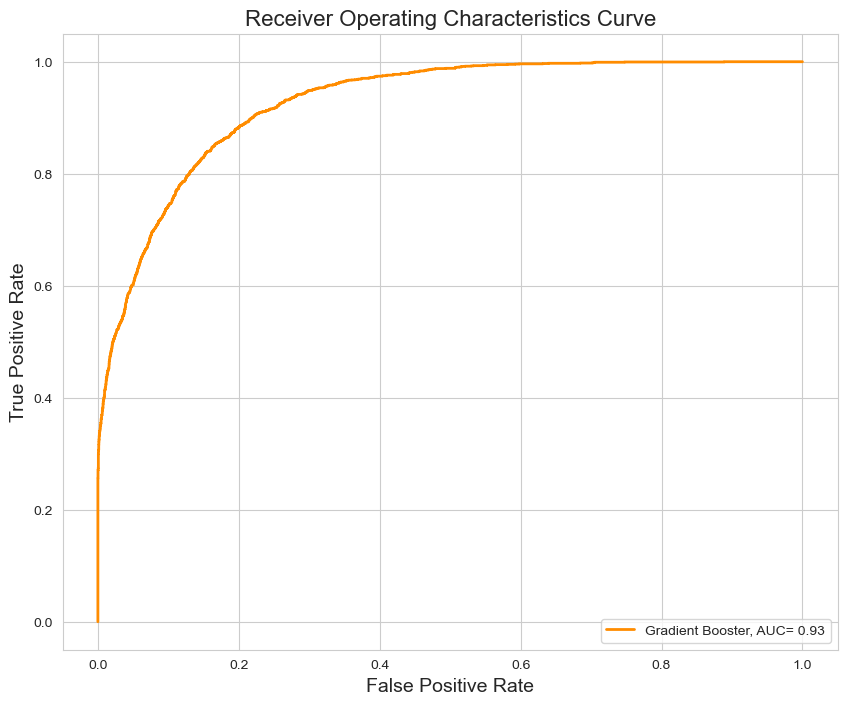

In [ ]:
# roc curve for XGBoost
gb_proba = gb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds =roc_curve(y_test,gb_proba)

# auc for XGBoost
auc_score = auc(fpr,tpr)

#plotting roc_curve for XGBoost
plt.figure(figsize=(10, 8))
plt.plot(fpr,tpr, color='darkorange',lw=2, label= f"Gradient Booster, AUC= {round(auc_score,2)}")
plt.title('Receiver Operating Characteristics Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')

**Confusion Matrix**

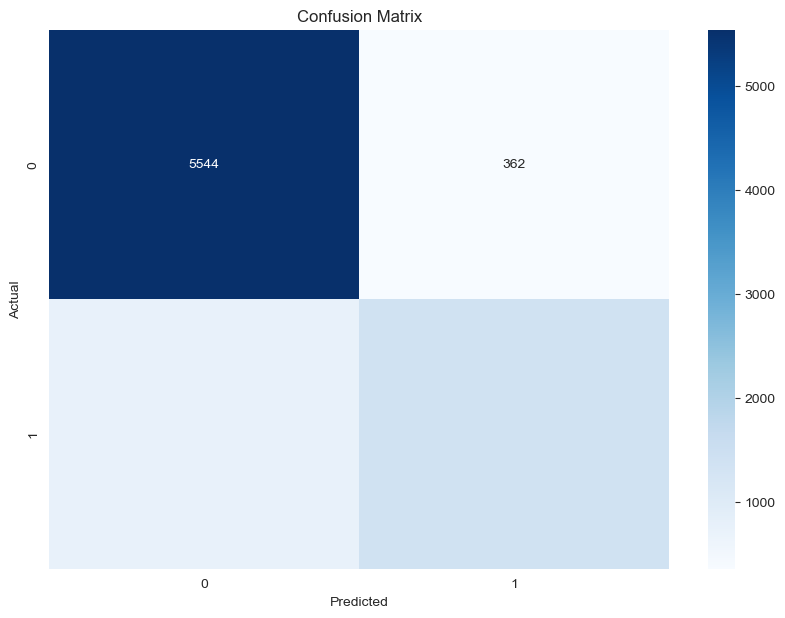

In [ ]:
# Confusion matrix for Gradient Booster
cm = confusion_matrix(y_test, gb_pred, labels=gb.classes_ )

# Printing Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lab_encoder.classes_,yticklabels=lab_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Accuracy Score**


In [ ]:
# Accuracy score for Gradient Booster
accuracy = accuracy_score(y_test,gb_pred)

# Printing accuracy score
print(f"Gradient Booster Accuracy: {round(accuracy,2)}")

Gradient Booster Accuracy: 0.86


**Precision Score**

In [ ]:
# Precision score for Gradient Booster
precision = precision_score(y_test,gb_pred)

# Printing Precision score
print(f"Gradient Booster Precision score: {round(precision,2)}")

Gradient Booster Precision score: 0.79


**F1 Score**

In [ ]:
# F1 score for Gradient Booster
f1 = f1_score(y_test,gb_pred)

# Printing F1 score
print(f"Gradient Booster F1 score: {round(f1,2)}")

Gradient Booster F1 score: 0.71


**Recall Score**

In [ ]:
# Recall score for Gradient Booster
recall = recall_score(y_test,gb_pred)

# Printing Recall score
print(f"Gradient Booster Recall score: {round(recall,2)}")

Gradient Booster Recall score: 0.65


**Classification Report**

In [ ]:
# Classification report for Gradient Booster
Class_report = classification_report(y_test,gb_pred)

# Printing Classification report
print(f"Gradient Booster Classification report: {(Class_report)}")

Gradient Booster Classification report:               precision    recall  f1-score   support

           0       0.88      0.94      0.91      5906
           1       0.79      0.65      0.71      2126

    accuracy                           0.86      8032
   macro avg       0.84      0.79      0.81      8032
weighted avg       0.86      0.86      0.86      8032



# 12.00 Summary and Conclusion

### I. Summary

The following is the summary of key processes carried-out in this prject.
**Insght from Exploratory Data Analysis**
i. Income Distribution by Education Level: According to the dataset HS-grad has the highest number of people with income <=50k, while those with Bachelor degree lead in >50k income.

ii. Income Distribution by Age:  As displayed below, there are more people aged 35-40 that are earning <=50k than those within the same age range that are earning >50k in the dataset.

iii. Income Distribution by Workclass: those earning <=50k are the majority and are mostly concentrated in the 'private' workclass.

**Model Performance**
The model has an accuracy of .86 which is high. But accuracy cannot be relied upon because of the inherent class imbalance in the dataset. One metric that can be relied upon is the roc-auc which is about 0.93 this particular matric can say it all about the model performance. It indicates the models robustness across all thresholds.

With a gridsearch cross-validation  accuracy score of .87 which is based on the training data and the test accuracy which is .86 as obtained after the grid search, indicates that the model is not overfitting. Other mtrics that are indicating the good performance of the model include f1 score= 0,71 which is the trade-off between precision and recall, precision= 0.79 which is and indication of the models ability to make true predictions. Recall got a score of .65

Based on these metrics, the model has very high abilty to classify and generalise income across the individuals.

### II. Conclusion

Overall this project has achieved its objectives of developing a robust model that can generalise on a new data. a high roc-auc of .93 is the metric that indicates this development. also the negligible difference between the training accuracy and that of the testing accuracy indicates no overfitting in the model allowing the model to generalise on new dataset.

# 13.00 Recommendation

Based on the perfaormace of the model, the following is recommended.
i. The features in the dataset that can contribute to the predictive powers of the model should be increased.

ii. Much attention should be given during data collection in order to collect a more quality data.  